In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t', decimal = '.')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

При первой попытке вывести данные видно, что данные "склеились" и часто мелькает "\t" перед в тексте, поэтому указываем в параметре sep разделитель "\t". Разделитель дробей (decimal) здесь - точка.


### Предобработка данных

Для начала преобразуем формат first_day_exposition в дату:

In [214]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_a

'living_area' оставляем незаполненным.

In [215]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'] = df['is_apartment'].astype('bool')
#проверка
df['is_apartment'].isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_ar

Отсутствие значения в 'is_apartment' скорее всего означает, что это не апартаменты, то есть False. Так как в исходной таблице этот столбец формата object, преобразовываем его в тип 'bool'.

In [216]:
print('Пропущенных значений до обработки студий:', df['kitchen_area'].isna().sum() )
def kitchen(studio):
    if studio == 1:
        return 0

df['kitchen_area'] = df['kitchen_area'].fillna(df['studio'].apply(kitchen))
print('Пропущенных значений после обработки студий:', df['kitchen_area'].isna().sum() )

Пропущенных значений до обработки студий: 2278
Пропущенных значений после обработки студий: 2129


В квартирах-студиях может не указываться площадь кухни, поэтому заполняем пропущенные значения нулем.

In [217]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'] = df['balcony'].astype('int')

Отсутствие значений в 'balcony' скорее всего означает отсутсвие балконов, то есть 0.

In [218]:
df['locality_name'] = df['locality_name'].fillna('unknown')

'locality_name' лучше заменить на значение "unknown" для удобства в дальнейшей работе

ceiling_height лучше оставить с отсутствующими значениями, потому что их не предопределить,
аналогично floors_total

In [219]:
#пропущенные значения по столбцам используемым в следующей сводной таблице целесообразно разделить по локальным группам и заменить на медианное значение соответсвующее условию 
#для более простого процесса замены пропущенных значений создаю сводную таблицу
df_pivot = df.pivot_table(index = 'locality_name', values = ('airports_nearest','cityCenters_nearest','parks_around3000','parks_nearest','ponds_around3000','ponds_nearest'), aggfunc = 'median')
df_pivot

,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
locality_name,,,,,,
unknown,22041.0,8943.0,0.0,472.0,1.0,374.0
Зеленогорск,72282.0,53381.0,3.0,147.5,1.0,507.0
Колпино,26232.0,32018.0,0.0,393.0,1.0,509.0
Красное Село,25715.5,29140.5,0.0,428.5,0.0,225.5
Кронштадт,67850.0,49575.0,2.0,293.0,2.0,312.0
Ломоносов,48415.5,51677.0,0.0,407.0,1.0,553.0
Павловск,20529.5,32683.0,2.0,312.0,2.0,458.0
Петергоф,39231.0,33771.0,1.0,294.0,1.0,474.0
Пушкин,15766.0,27930.5,1.0,399.5,0.0,444.0


In [220]:
print('Пропущенных значений до обработки: ',df['airports_nearest'].isna().sum())

def airports(city):
    if city in df_pivot.index:
        return int(df_pivot['airports_nearest'][city])
df['airports_nearest'] = df['airports_nearest'].fillna(df['locality_name'].apply(airports))
print('Пропущенных значений после обработки: ',df['airports_nearest'].isna().sum())

Пропущенных значений до обработки:  5542
Пропущенных значений после обработки:  5386


In [221]:
print('Пропущенных значений до обработки: ',df['cityCenters_nearest'].isna().sum())

def center(city):
    if city in df_pivot.index:
        return int(df_pivot['cityCenters_nearest'][city])
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(df['locality_name'].apply(center))
print('Пропущенных значений после обработки: ',df['cityCenters_nearest'].isna().sum())

Пропущенных значений до обработки:  5519
Пропущенных значений после обработки:  5386


### Расчет дополнительных показателей

In [222]:
df['price_metr'] = df['last_price'] / df['total_area']
df['day_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).day
df['month_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).year
df['living_total_area'] = df['living_area'] / df['total_area']
df['kitchen_total_area'] = df['living_area'] / df['kitchen_area']

def floor_group (row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'Первый'
    if floor == floors_total:
        return 'Последний'
    else:
        return 'Другой'
df['floor_group'] = df.apply(floor_group, axis = 1 )

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_metr,day_exposition,month_exposition,year_exposition,living_total_area,kitchen_total_area,floor_group
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,NaN,120370.370370,7,3,2019,0.472222,2.040000,Другой
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,NaN,81.0,82920.792079,4,12,2018,0.460396,1.690909,Первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,2.0,574.0,558.0,92785.714286,20,8,2015,0.612500,4.132530,Другой
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,3.0,234.0,424.0,408176.100629,24,7,2015,NaN,NaN,Другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,100000.000000,19,6,2018,0.320000,0.780488,Другой


### 4.1 Изучение параметров

In [224]:
df_cut = df[['total_area','last_price','rooms','ceiling_height']].copy()
df_cut.describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,2.369900e+04,23699.000000,14504.000000
mean,60.348651,6.541549e+06,2.070636,2.771499
std,35.654083,1.088701e+07,1.078405,1.261056
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.520000
50%,52.000000,4.650000e+06,2.000000,2.650000
75%,69.900000,6.800000e+06,3.000000,2.800000
max,900.000000,7.630000e+08,19.000000,100.000000


По неочищенным данным:


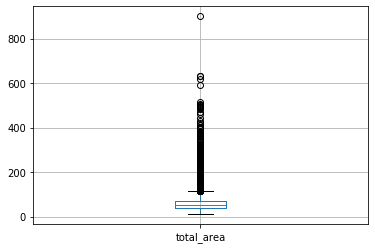


По очищенным данным исходя из ящика с усами:


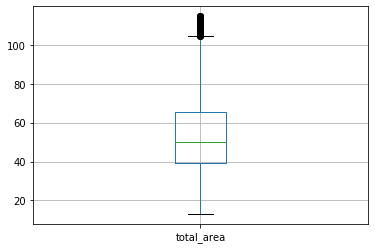

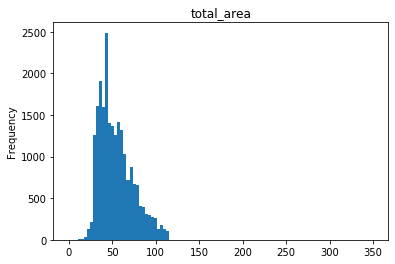

In [225]:
print('По неочищенным данным:')

df_cut.boxplot('total_area')
plt.show()

print()

print('По очищенным данным исходя из ящика с усами:')

df_cut_area = df_cut.query('12 < total_area < 115')

df_cut_area.boxplot('total_area') #13 < x < 104.8
plt.show()

df_cut_area['total_area'].plot(bins = 100, range = (0,350), kind = 'hist', title = 'total_area') #пик около значения 50 (похоже на пуассоновское распределение(?))
plt.show()


###### total_area:
    1. Пик графика находится у значения "50", что похоже на правду
    2. На гистограмме значения заканчиваются на 115.5
    3. Ящик с усами сужает еще больше: все, больше 104.8 - выбросы, нижний ус упирается 13 
    4. Оставим от 13 по ящику с усами и до 115.5 по гистограмме

Данные от 2% до 98%:


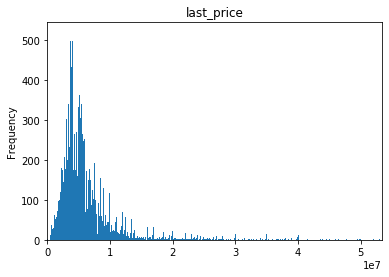

Обработанные данные:


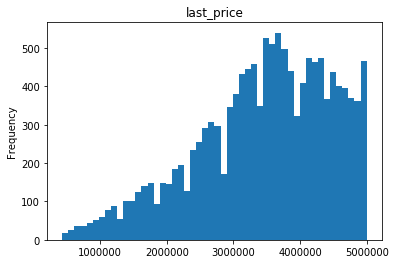

In [226]:
lower = np.quantile(df_cut['last_price'],0.2)
top = np.quantile(df_cut['last_price'],0.98)

print('Данные от 2% до 98%:')
df_cut_price = df_cut.query('@lower <= last_price <= @top')


plt.xlim(0,53350000) #оставим от 393684 до 50млн
df_cut['last_price'].plot(bins = 10000, kind = 'hist', title = 'last_price') #пик у нуля
plt.show()

print('Обработанные данные:')

df_cut_second = df_cut.query('393684 <= last_price <= 5000000')

df_cut_second['last_price'].plot(bins = 50, kind = 'hist', title = 'last_price')
plt.show()

###### last_price:
    1. Похоже на нормальное распределение
    2. Судя по гистограмме хвост начинается примерно от 50млн, вполне правдоподобно, если квартира большая и в хорошем районе
    3. После среза по квантилям начинается цена от ~393684, вполне вероятно, если это глубоко в области и малого метража
    4. Исходя из графика можно оставить значения от 393684 до 50млн.
    (второй график все равно какой то странный и скошенный)

По неочищенным данным:


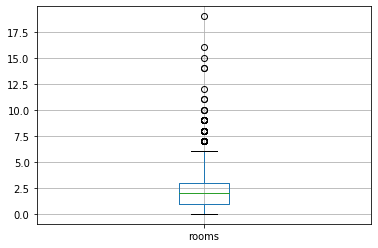

По очищенным данным:


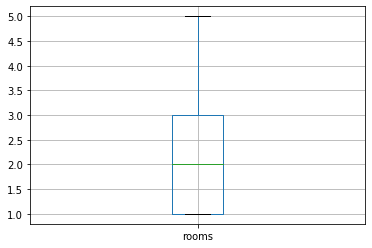

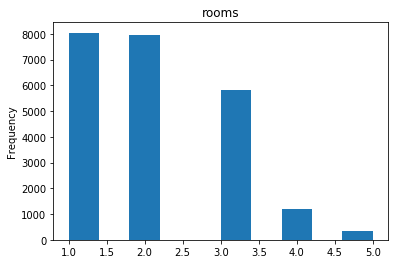

In [227]:
print('По неочищенным данным:')
df_cut.boxplot('rooms')
plt.show()

#df_cut['rooms'].plot(bins = 20, kind = 'hist', title = 'rooms') #пик у 2,5
#plt.show()

df_cut_rooms = df_cut.query('0 < rooms < 6')
print('По очищенным данным:')

df_cut_rooms.boxplot('rooms')
plt.show()
print()

df_cut_rooms['rooms'].plot(kind = 'hist', title = 'rooms') #пик у 1 и 2
plt.show()

###### rooms:
    1. Убираем выбросы по ящику с усами
    2. Строим ящик с усами : на гистограмме хвост начинается от значения 1, на boxplot'e заканчивается ус в 5.

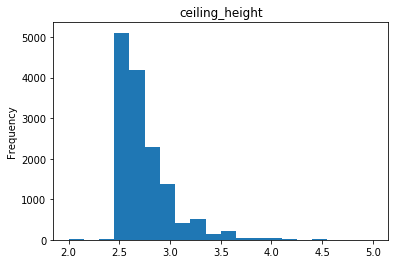

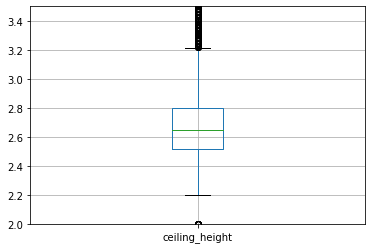

In [228]:
df_cut['ceiling_height'].plot(bins = 20, range = (2,5), kind = 'hist', title = 'ceiling_height') #пик у 2.5
plt.show()
plt.ylim(2,3.5)
df_cut.boxplot('ceiling_height')
plt.show()



###### ceiling_height:
    1. График не похож на график с нормальным рапределением (надеюсь правильно сказала)
    2. На графике с ящиком с усами видно, какое большое количество выбросов в этом столбце
    3. Оставим данные от 2,2 до 4,5 

### 4.2
Изучение времени продажи квартиры.

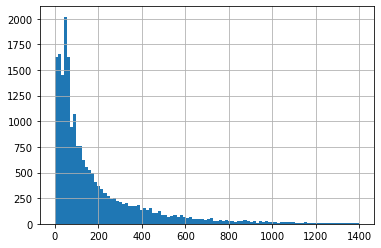

In [229]:
df['days_exposition'].hist(bins = 100, range = (0,1400))
plt.show()

1. На графике пик у нуля, опять нехорошо, также есть внушительный пик у 95
2. Подозрительно быстрые продажи - меньше недели (остальные данные вроде ничего, поиграла с масштабом графика и посмотрела)
3. Подозрительно долгие продажи - дольше 800 дней (ну в принципе реалистично)


count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

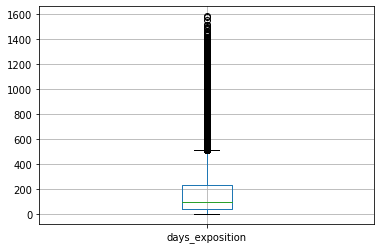

In [230]:
df.boxplot('days_exposition')
df['days_exposition'].describe()

Дополнительно выведем ящик с усами:
1. Все, выше третьего квартиля - долгие продажи, все, выше конца верхнего уса (усика/усов?), это 432, необычно долго
2. Правый ус упирается в значение 432,что вполне имеет право на существование, а вот левый в единицу и это подозрительно 
3. Используем describe(), чтобы увидеть стандартное отклонение, которое оказалось огромным - 207
4. Среднее и медиана отличаются почти в два раза, что подтверждает еще раз пункт 3.

Изучим данные более подробно, возьмемся сначала за слишком большие значения

In [231]:
longest = (df
 .query('days_exposition > 432')
 .sort_values(by = 'days_exposition')
)
longest.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_metr,day_exposition,month_exposition,year_exposition,living_total_area,kitchen_total_area,floor_group
6540,4,3600000.0,42.0,2015-11-03,1,2.56,10.0,18.0,10,False,...,3.0,291.0,433.0,85714.285714,3,11,2015,0.428571,1.800000,Последний
9847,8,3800000.0,45.5,2016-09-05,2,2.50,9.0,28.5,1,False,...,0.0,NaN,433.0,83516.483516,5,9,2016,0.626374,4.071429,Первый
562,4,3750000.0,62.5,2016-04-19,2,NaN,9.0,32.0,1,False,...,0.0,NaN,433.0,60000.000000,19,4,2016,0.512000,3.200000,Первый
12286,12,4350000.0,36.0,2016-09-01,1,2.60,19.0,20.0,7,False,...,0.0,NaN,433.0,120833.333333,1,9,2016,0.555556,NaN,Другой
23406,16,2750000.0,31.5,2016-05-31,1,NaN,25.0,14.6,23,False,...,NaN,NaN,433.0,87301.587302,31,5,2016,0.463492,1.536842,Другой


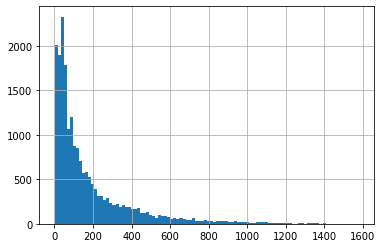

In [232]:
df['days_exposition'].hist(bins = 100)

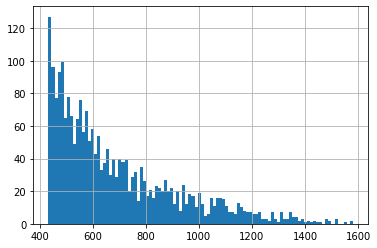

In [233]:
longest['days_exposition'].hist(bins = 100)

Сравниваем гистаграммы среза и исходных данных:
1. Гистаграмма среза:
    - Пик у 432
    - "Хвост" начинается от 1500
2. Гистаграмма исходных данных:
    - Пик у 0 и у 95
    
Несмотря на это внешне похожи, можем принять верхнюю границу за 1520(при масштабировании показалось самым оптимаьлным), теперь можно взяться за слишком быстрые продажи

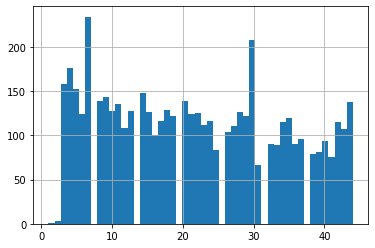

In [234]:
shortest = (df
            .query('days_exposition < 45')
            .sort_values(by = 'days_exposition')
           )
shortest['days_exposition'].hist(bins = 50)

1. Этот график совсем не похож на график по изначальной таблице.
2. Пики у : 7.5, 30
3. Оставим за нижнюю границу значение 7,5

### 4.3 Поиск аномалий
#### days_exposition:

In [235]:
# 7,5 < days_exposition < 1520
optimal = df.query('7.5 < days_exposition < 1520')
print('Процент отброшенных значений:',1-(len(optimal)/len(df['days_exposition'].dropna())))

Процент отброшенных значений: 0.041475777366214994


Oт 4% данных мы, вроде, можем позволить себе избавиться
p.s. здесь если отбрасывать по квантилям, то отбрасывается слишком много
#### ceiling_height:

In [236]:
# 2,2 < ceiling_height < 4,5
optimal_ceil = df.query('2.2 <= ceiling_height <= 4.5')
print('Процент выбросов по высоте потолков:',1-(len(optimal_ceil))/len(df['ceiling_height'].dropna()))

Процент выбросов по высоте потолков: 0.0038610038610038533



#### rooms:
здесь квантили 2% и 98% соответствуют выбранным мной ранее значениям (1 и 5)

In [237]:
# 1 < rooms < 5
optimal_rooms = df.query('1 <= rooms <= 5')
print('Процент выкинутых значений по количеству комнат:',1-(len(optimal_rooms)/len(df['rooms'].dropna())))

Процент выкинутых значений по количеству комнат: 0.01654078231148992


#### total_area:

In [238]:
lower_area = np.quantile(df['total_area'], 0.02)
top_area = np.quantile(df['total_area'], 0.98)
optimal_area = df.query('@lower_area <= total_area <= @top_area')
print('Процент выкинутых значений по общей площади:',1 - (len(optimal_area))/len(df['total_area'].dropna()))


Процент выкинутых значений по общей площади: 0.03987510021519891


#### last_price:

In [239]:
lower = np.quantile(df['last_price'], 0.02)
top = np.quantile(df['last_price'], 0.99)
optimal_price = df.query('@lower <= last_price <= @top')
print('Процент выкинутых значений по цене:',1 - (len(optimal_price)/len(df['last_price'].dropna())))


Процент выкинутых значений по цене: 0.028735389678889445


### 4.4
Какие факторы больше всего влияют на стоимость квартиры?

In [240]:
print('Корреляция между столбцами таблицы и "last_price":')

df.corr().sort_values(by = 'last_price')['last_price']

Корреляция между столбцами таблицы и "last_price":


cityCenters_nearest   -0.206909
ponds_nearest         -0.084809
year_exposition       -0.043089
airports_nearest      -0.028688
studio                -0.025362
parks_nearest         -0.016414
open_plan             -0.008802
floors_total          -0.006984
living_total_area      0.002501
month_exposition       0.002779
balcony                0.008559
day_exposition         0.009172
floor                  0.026576
is_apartment           0.026958
days_exposition        0.081146
ceiling_height         0.085430
total_images           0.104473
kitchen_total_area     0.126122
parks_around3000       0.151058
ponds_around3000       0.159996
rooms                  0.363343
kitchen_area           0.518303
living_area            0.566492
total_area             0.653675
price_metr             0.736499
last_price             1.000000
Name: last_price, dtype: float64

<span style="color:green">

##### Коэффициенты корреляции: 
1. Цена/цена на метр 
        
        Логично, что здесь будет высокий уровено корреляции
2. Цена/кол-во комнат 
        
        Тоже логично - больше комнат = больше цена, как и наоборот
3. Цена/этаж
        
        Здесь связь тоже есть, но достаточно слабая, этаж влияет на стоимость, но не сильно
4. Цена/удаленность от центра
        
        Корреляция здесь отрицательная, потому что при повышении цены, расстояние до центра будет уменьшаться, эти факторы обратно пропорциональны друг другу
5. Цена/день, цена/месяц
        
        Взаимосвязь есть, но достаточно слаба. В случае с днем она сильнее, но всего на 0.04, возможно чаще квартиры покупают в конце месяца?
6. Цена/год
        
        Странно, что здесь коэффициент орицательный, ведь это означает, что чем раньше купили квартиру, тем она была дороже. Не очень логично.

### 4.5
Анализ 10 населённых пунктов с наибольшим числом объявлений.

In [241]:
print('Таблица с кол-вом объявлений и средней ценой за метр:')
df['locality_name'].value_counts()
pivot = df.pivot_table(index = 'locality_name', values = 'price_metr', aggfunc = {'count','mean'})
pivot.columns = ['number','mean_price']
pivot = pivot.sort_values(by = 'number', ascending = False)
pivot = pivot.head(10)
pivot

Таблица с кол-вом объявлений и средней ценой за метр:


,number,mean_price
locality_name,,
Санкт-Петербург,15721,114849.008794
посёлок Мурино,522,85752.189195
посёлок Шушары,440,78677.364217
Всеволожск,398,68654.473986
Пушкин,369,103125.819291
Колпино,338,75424.579098
посёлок Парголово,327,90175.913458
Гатчина,307,68746.146763
деревня Кудрово,299,92473.547576


In [242]:
print('Регион с самой высокой стоимостью жилья:', pivot.index[0])

Регион с самой высокой стоимостью жилья: Санкт-Петербург


In [243]:
print('Регион с самой низкой стоимостью жилья:', pivot.index[9])

Регион с самой низкой стоимостью жилья: Выборг


### 4.6
Выделение квартир в Санкт-Петербурге ('locality_name'). 

In [244]:
df_spb = df.query('locality_name == "Санкт-Петербург"').copy()

Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. 

In [245]:
df_spb['cityCenters_nearest_km'] = round(df_spb['cityCenters_nearest']/1000)
df_spb['cityCenters_nearest_km'] = df_spb['cityCenters_nearest_km'].astype(int)

После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.


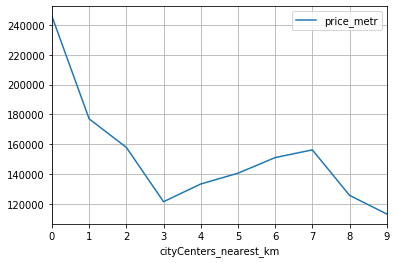

In [246]:
df_spb_pivot = df_spb.pivot_table(index = 'cityCenters_nearest_km', values = 'price_metr', aggfunc = 'mean') #нашли среднюю цена
df_spb_pivot['cityCenters_nearest_km'] = df_spb_pivot.index #для последующего построения графика
#plt.xlim(0,20)
(df_spb_pivot
    .query('cityCenters_nearest_km < 10')
    .plot(x = 'cityCenters_nearest_km', y = 'price_metr', grid = True)
    )
plt.show()

Самые дорогие квартиры находятся ближе всего к центру, то есть к нулю. Cпад от 0 до 3км, значит центральная зона примерно 3км

### 4.7
Выделим сегмент квартир в центре. Анализ этой территории и изучение следующих параметров: площадь, цена, число комнат, высота потолков. Также выделение факторов, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)

In [247]:
center_spb = df_spb[['floor','days_exposition','total_area','last_price','rooms','ceiling_height','cityCenters_nearest_km']]
center_spb = center_spb.query('cityCenters_nearest_km <= 3')
center_spb.corr().sort_values(by = 'last_price')['last_price']

cityCenters_nearest_km   -0.180389
days_exposition           0.043470
ceiling_height            0.045944
floor                     0.224601
rooms                     0.240349
total_area                0.565577
last_price                1.000000
Name: last_price, dtype: float64

1. Связь с ceiling_height положительная, но слишком мала, чтобы быть значимой
2. Связь с days_exposition положительная, но слишком мала, чтобы быть значимой
3. Связь с cityCenters_nearest_km отрицательная: чем ближе к границе центра, тем дороже (это возможно из-за того, что на Петроградке и на Крестовском здания премиум класса, хотя совсем не в центре)
4. Значения rooms и floor примерно одинаково влияют на формирование цены, но не очень значительно
5. Прямая сильная связь цены квартиры с ее площадью, что вполне логично и объяснимо - платят за квадртаный метр.

Выведем для сравнения корреляции по всему городу, предварительно избавившись от ненужных сейчас столбцов

In [248]:
df_spb1 = df_spb[['floor','days_exposition','total_area','last_price','rooms','ceiling_height','cityCenters_nearest_km']]
df_spb1.corr().sort_values(by = 'last_price')['last_price']

cityCenters_nearest_km   -0.257844
floor                    -0.000838
ceiling_height            0.089615
days_exposition           0.092538
rooms                     0.372375
total_area                0.657188
last_price                1.000000
Name: last_price, dtype: float64

1. Также как и в центре по всему городу самый важный фактор формирования цены - общая площадь
2. Здесь,что странно, чем дальше от центра, тем больше цена, но не на много
3. Связь с floor слишком мала, чтобы ее рассматривать
4. Связь с days_exposition, ceiling_height также практически отсутсвует, но тем не менее положительна и может влиять на цену, но незначительно
4. Увеличивается корреляция между ценой и количеством комнат: больше комнат - выше цена

### Общий вывод

По итогам исследования можно однозначно сказать, что:

1. Пользователи игнорируют заполнение многих полей, что затрудняет работу с данными
2. В Санкт-Петербурге на конечную стоимость жилья прямо пропорционально больше всего влияет площадь и количество комнат
3. Также для Петербурга важна степень удаленности от центра - чем дальше от центра, тем дешевле квартира

Для отслеживания мошеннической деятельности установили ограничения по:

1. Высоте потолков
2. Общей площади
3. Количеству комнат
4. Цена
